__Lab 03 - Analysis__

Student Names: [Ganesh Veluru & Jwala Sri Hari Badam]

Group Number: [3]

# Setup

Below will import the `TRNGtester` class from the `NIST.py` script to test the random data.

Also, add any other library here that you may need to import.

In [11]:
from NIST import TRNGtester
from NIST import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print("✔️ OK to continue!")

✔️ OK to continue!


# Test and get P-Values

Instantiate a `TRNGtester` object to load the random data. Then, call the `run_nist_tests()` method from this object to generate the _list of list_ of p-values. Each sub-list correspond to each test. Some test may have multiple p-values -- only use the _minimum_ from each test.

Repeat this for each dataset (i.e., 1M and 10M bits from both the RO/LFSR TRNG and the GARO TRNG)

In [12]:
# storing filepaths into variables.
ro_1M = "../Data/RO_LFSR_TRNG_1M.bin"
ro_10M = "../Data/RO_LFSR_TRNG_10M.bin"
ga_1M = "../Data/GARO_TRNG_1M.bin"
ga_10M = "../Data/GARO_TRNG_10M.bin"

In [13]:
# storing varaibles in dictionary
dict_values={
    'RO_LFSR_TRNG_1M':ro_1M,
    'RO_LFSR_TRNG_10M':ro_10M,
    'GARO_TRNG_1M':ga_1M,
    'GARO_TRNG_10M':ga_10M
}

In [14]:
# method for returning the min values from the list passed
def get_min_lst(lst):
    res = [min(i) for i in lst]
    return res

In [15]:
#script to run all tests for the data collected.
res_values ={}

for i,j in dict_values.items():
    # creating an object
    rand = TRNGtester(j)

    # Running all test
    rand_final = rand.run_nist_tests()
    print(rand_final)
    values = get_min_lst(rand_final)
    res_values[i]=values
 
    print("==================================================================================")

hey into the function
Starting: monobit_test
		Results (p-value(s), Pass/Fail) = 
			[1.6351636375438384e-86, False]
✔️ Test completed in 0.0019898414611816406s


Starting: frequency_within_block_test
		Results (p-value(s), Pass/Fail) = 
			[1.0, True]
✔️ Test completed in 0.004531145095825195s


Starting: runs_test
		Results (p-value(s), Pass/Fail) = 
			[1.5250481346350765e-05, False]
✔️ Test completed in 0.00676274299621582s


Starting: longest_run_within_block_test
		Results (p-value(s), Pass/Fail) = 
			[0.016858825303069543, True]
✔️ Test completed in 0.006473541259765625s


Starting: binary_matrix_rank_test
		Results (p-value(s), Pass/Fail) = 
			[0.1685778868919955, True]
✔️ Test completed in 0.026611804962158203s


Starting: discrete_fourier_transform_test
		Results (p-value(s), Pass/Fail) = 
			[0.0, False]
✔️ Test completed in 0.05452728271484375s


Starting: non_overlapping_template_matching_test
		Results (p-value(s), Pass/Fail) = 
			[0.017896446651748447, True]
✔️ Test c

		Results (p-value(s), Pass/Fail) = 
			[0.20249561278864803, True]
✔️ Test completed in 0.2637443542480469s


Starting: serial_test
		Results (p-value(s), Pass/Fail) = 
			[(0.4310881948875533, True), (0.6092553493620102, True)]
✔️ Test completed in 0.21094369888305664s


Starting: approximate_entropy_test
		Results (p-value(s), Pass/Fail) = 
			[0.6674820758211155, True]
✔️ Test completed in 0.10865187644958496s


Starting: cumulative_sums_test
		Results (p-value(s), Pass/Fail) = 
			[0.09952496059370827, True]
✔️ Test completed in 0.009344816207885742s


Starting: random_excursion_test
		Results (p-value(s), Pass/Fail) = 
			[(0.4053776275103841, True), (0.6285051475131114, True), (0.3615751232875408, True), (0.5250887016414068, True), (1.0, True), (0.970980917797388, True), (0.5902032795047896, True), (0.3386398993203509, True), (0.6051292075938516, True)]
✔️ Test completed in 0.12475180625915527s


Starting: random_excursion_variant_test
		Results (p-value(s), Pass/Fail) = 
			[(1

# Stats

Calculate: how many tests passed (p-value ≥ 0.01) or failed (p-value < 0.01)?

Repeat this for each dataset (i.e., 1M and 10M bits from both the RO/LFSR TRNG and the GARO TRNG)

In [31]:
# Counting the passed tests for each TRNG(1M and 10M)
print("Dataset","    Count Passed")
print("==========================")
for i,j in res_values.items():
    count_passed = 0
    for k in j:
        if k > 0.01:
            count_passed+=1
    print(i,"--->",count_passed)
    print('-------------------------')

Dataset     Count Passed
RO_LFSR_TRNG_1M ---> 8
-------------------------
RO_LFSR_TRNG_10M ---> 7
-------------------------
GARO_TRNG_1M ---> 15
-------------------------
GARO_TRNG_10M ---> 14
-------------------------


# Plots

Plot and save (as PDF) a vertical bar graph for the NIST test. Make sure to format the plots with adequate size, title, axis labels, ... (see the Tutorial-01-Python).

To generate vertical bar graphs, use `plt.bar()`. Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Make sure to annotate each bar indicating if the test `pass` or `fail`, use `plt..annotate()`. Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

In [32]:
def plot_bar(lst,title,outfile,col):
    
    rn = lst #ro10_final, garo1_final, garo10_final

    # set figure size
    plt.figure(figsize=(7.5,7), constrained_layout=True)

    # format the plot
    plt.title(title)   # adds title
    plt.ylabel("P-Values")                    # adds x-axis label
    plt.xlabel("NIST Tests")                  # adds y-axis label

    # hard-code x axis for 15 NIST tests
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))

    # make smaller steps for p-values
    plt.yticks(np.arange(0, max(rn)+1, step=0.1))
    rng = plt.bar(x, rn, width=0.7, color=col)

    # loop to annotate the bars in the bar chart
    xiter = 0
    yiter = 0

    for bar in rng:
        if rn[yiter] >= 0.01:
            plt.annotate('pass', 
                         xy = (x[xiter], rn[yiter]), 
                         xytext = (x[xiter] - 0.5, rn[yiter] + 0.01))
        else:
            plt.annotate('fail', 
                         xy = (x[xiter], rn[yiter]), 
                         xytext = (x[xiter] - 0.3, rn[yiter] + 0.01))
        xiter += 1
        yiter += 1

    # save the plot
    plt.savefig("../Figures/"+ outfile +".pdf") # PDF recommended
    plt.savefig("../Figures/"+ outfile+".png", dpi=500)

    # Display the plot
    plt.show(rng)

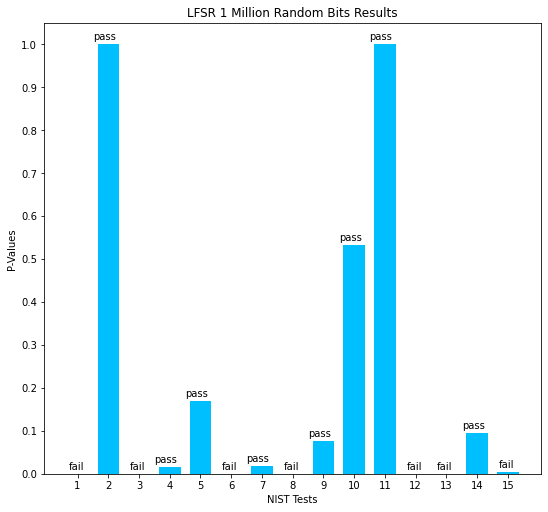

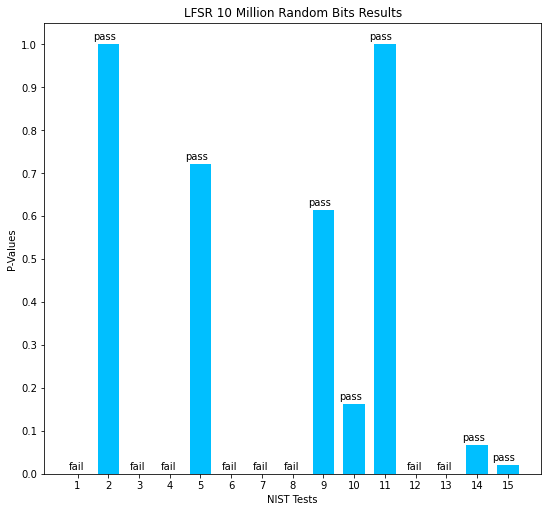

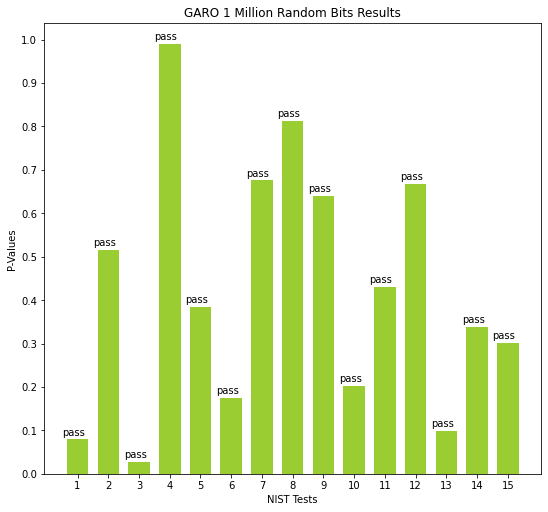

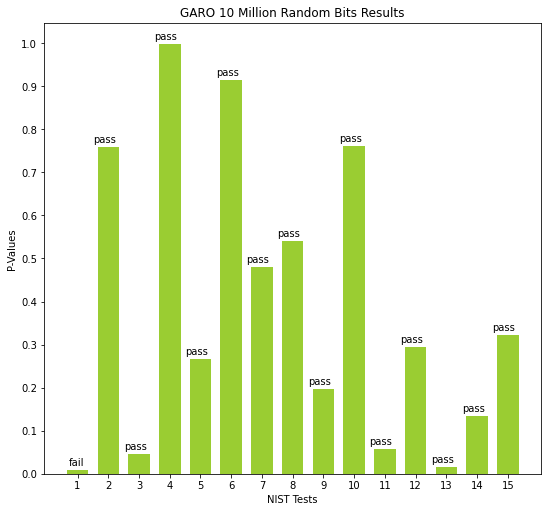

In [38]:
plot_bar(res_values['RO_LFSR_TRNG_1M'],"LFSR 1 Million Random Bits Results","RO_LFSR_TRNG_1M",'deepskyblue')
plot_bar(res_values['RO_LFSR_TRNG_10M'],"LFSR 10 Million Random Bits Results","RO_LFSR_TRNG_10M",'deepskyblue')
plot_bar(res_values['GARO_TRNG_1M'],"GARO 1 Million Random Bits Results","GARO_TRNG_1M",'yellowgreen')
plot_bar(res_values['GARO_TRNG_10M'],"GARO 10 Million Random Bits Results","GARO_TRNG_10M",'yellowgreen')